In [48]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

2. What is the average height of the players?

In [52]:
match_away_team_df=pd.read_csv('MatchAwayTeamInfo.csv')
match_home_team_df=pd.read_csv('MatchHomeTeamInfo.csv')
match_home_name_height=match_home_team_df.iloc[:,[1,7]]
match_home_name_height=match_home_team_df.iloc[:,[1,7]]
height_player=pd.concat([match_home_name_height,match_home_name_height])
height_player['height'].dropna(inplace=True)
height_player.drop_duplicates(inplace=True)
height_player['height'].mean()


np.float64(1.819877358490566)

According to the given information, the average height of the players in this series of matches is 1.82

4. What is the longest match recorded in terms of duration?

In [4]:
match_time_df=pd.read_csv('MatchTimeInfo.csv')
match_time_df.head()
match_time_df.fillna(0,inplace=True)
match_time_df.drop_duplicates(inplace=True)

In [5]:

match_time_df['sumation_time_periods_match']=match_time_df.iloc[:,[1,2,3,4,5]].sum(axis=1)
match_time_df.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
0,12260075,3463.0,3855.0,0.0,0.0,0.0,1.714511e+09,7318.0
1,12260076,3032.0,2121.0,2674.0,0.0,0.0,1.714492e+09,7827.0
2,12260077,2747.0,3525.0,4074.0,0.0,0.0,1.714492e+09,10346.0
3,12260078,2519.0,2531.0,2121.0,0.0,0.0,1.714578e+09,7171.0
4,12260080,2616.0,2766.0,0.0,0.0,0.0,1.714483e+09,5382.0


In [54]:
longest_time=match_time_df['sumation_time_periods_match'].max()
longest_match=match_time_df.loc[(match_time_df['sumation_time_periods_match']==longest_time),:]
longest_match

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
13350,12346747,167761.0,3392.0,0.0,0.0,0.0,1.716382e+09,171153.0


According to the given information ,the longest match recorded in terms of duration is the match with match-id:12346747 with 171153ps or 16h

6. Which country has produced the most successful tennis players?

In [7]:
country_current_rank=pd.concat([match_away_team_df[['full_name','country','current_rank']],match_home_team_df[['full_name','country','current_rank']]]).sort_values('current_rank').drop_duplicates().dropna().iloc[:,:]
country_current_rank.loc[country_current_rank['current_rank']<4 ,:].country.unique()

array(['Poland', 'Serbia', 'Belarus', 'Italy', 'USA', 'Spain'],
      dtype=object)

In [8]:
country_current_rank.drop(columns='full_name',inplace=True)
a=country_current_rank.groupby('country',as_index=False).mean().sort_values('current_rank').head()
a


,country,current_rank
69,Philippines,161.000000
1,Andorra,294.666667
55,Malta,330.500000
83,Syria,344.000000
13,Burundi,371.000000


Considering the above tables the Poland, Serbia, Belarus, Italy, USA, Spain countries gained the top 3 ranks in order that each place filled by two, but it cannot be claimed that Which country exactly produces the best tennis players. Moreover, based on the overall average ranks, The Philippines produced the best average rank overally.

8. Is there a difference in the number of double faults based on gender?

In [9]:
gender_match_away=match_away_team_df[['match_id','gender']]
gender_match_home=match_home_team_df[['match_id','gender']]
gender_match_id=pd.concat([gender_match_away,gender_match_home])
gender_match_id.drop_duplicates(inplace=True)

In [10]:
period=pd.read_csv('PeriodInfo.csv')
period.drop_duplicates(inplace=True)
match_id_statistic_name=period[['match_id','statistic_name']]
match_id_double_faults=match_id_statistic_name.loc[match_id_statistic_name.statistic_name == 'double_faults']

In [22]:
gender_double_faults=pd.merge(match_id_double_faults,gender_match_id,on='match_id')
gender_double_faults

,match_id,statistic_name,gender
0,12260075,double_faults,M
1,12260075,double_faults,M
2,12260075,double_faults,M
3,12260076,double_faults,M
4,12260076,double_faults,M
...,...,...,...
31250,12385873,double_faults,M
31251,12386383,double_faults,F
31252,12386383,double_faults,F
31253,12386383,double_faults,F


In [12]:
gender_double_faults.drop(columns='match_id', inplace=True)
gender_double_faults.groupby(['gender']).count()


,statistic_name
gender,
F,15596
M,15553


In conclusion of the given information, there are no difference between male and female in the number of double fault approximatelly

10. Is there a correlation between a player's height and their ranking?

In [13]:
match_home_team_height_rank_df=match_home_team_df.iloc[:,[17,7,14]]
match_away_team_height_rank_df=match_away_team_df.iloc[:,[17,7,14]]
match_away_team_height_rank_df
height_rank_player=pd.concat([match_home_team_height_rank_df,match_away_team_height_rank_df])
height_rank_player.drop_duplicates()
height_rank_player.dropna()
# height_rank_player.drop('full_name',inplace=True, axis=1)
height_rank_player.head()

,full_name,height,current_rank
0,"Nadal, Rafael",1.85,276.0
1,"Sinner, Jannik",1.88,2.0
2,"Struff, Jan-Lennard",1.93,39.0
3,"Rublev, Andrey",1.88,6.0
4,"Cerundolo, Francisco",1.85,23.0


In [14]:
height_rank_correlation=height_rank_player['height'].corr(height_rank_player['current_rank'])
if height_rank_correlation <0.3:
    print('There is a weak corrilation between players height and there rank')
elif 0.3<height_rank_correlation<0.5:
    print('There is a moderate corrilation between players height and there rank')
else:
    print('There is a strong corrilation between players height and there rank')    

There is a weak corrilation between players height and there rank


According to the given information,it cannot be claimed that there is a corrilation between players height and there rank

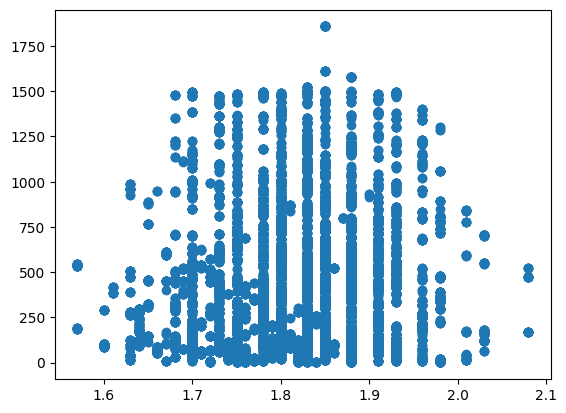

In [15]:
plt.scatter(height_rank_player['height'] ,height_rank_player['current_rank'])

12. What is the average number of games per set in men's matches compared to women's matches?

In [16]:
power_info_df=pd.read_csv('PowerInfo.csv')
set_game_powerinfo=power_info_df.iloc[:,[0,1,2]]
set_game_count=set_game_powerinfo.groupby(['match_id','set_num']).count()
set_game_count.drop_duplicates().head()


game_num
match_id set_num          
12260075 1              12
         2              10
12260076 2               9
12260077 2              13
12260078 1              20

In [17]:
gender_games_no=pd.merge(set_game_count,gender_match_id,on='match_id')
gender_games_no.head()

,match_id,game_num,gender
0,12260075,12,M
1,12260075,10,M
2,12260076,12,M
3,12260076,9,M
4,12260076,9,M


In [18]:
gender_games_no.drop(columns='match_id', inplace=True)
mean_gender_games_no=gender_games_no.groupby(['gender']).mean()
mean_gender_games_no

,game_num
gender,
F,17.355954
M,18.095078


On average, in men's matches, each set has 18 games and in women's matches, each set has 17 games

14. What is the most common type of surface used in tournaments?

In [19]:
match_tournament=pd.read_csv('MatchTournamentInfo.csv')
match_tournament.drop_duplicates(inplace=True)
ground_type_match=match_tournament[['ground_type','match_id']].groupby(['ground_type']).count()
ground_type_match.rename(columns={'match_id': 'number'},inplace=True)
ground_type_match


,number
ground_type,
Hardcourt indoor,241
Hardcourt outdoor,4606
Red clay,14238
Synthetic outdoor,93


In [20]:
ground_type_match.loc[ground_type_match.number== ground_type_match.number.max(),:]

,number
ground_type,
Red clay,14238


the most common type of surface used in tournaments is 'Red clay' that used in '14237' tournaments

16. Which player has the highest winning percentage against top 10 ranked opponents?

In [23]:

country_current_rank['full_name'].unique()
country_current_rank

KeyError: 'full_name'

extra question no1.
 Is there a correlation between a player's experiance and their ranking?  

In [ ]:
match_home_team_turned_rank_df=match_home_team_df.iloc[:,[17,10,14]]
match_away_team_turned_rank_df=match_away_team_df.iloc[:,[17,10,14]]
turned_rank_player=pd.concat([match_home_team_turned_rank_df,match_away_team_turned_rank_df])
turned_rank_player.drop_duplicates()
turned_rank_player.dropna(inplace=True)
turned_rank_player['experiance']=2024-turned_rank_player['turned_pro']
turned_rank_player.drop(columns='turned_pro', inplace=True)
turned_rank_player.drop_duplicates(inplace=True)
turned_rank_player.sort_values('experiance',ascending=False)

,full_name,current_rank,experiance
8006,"Zvonareva, Vera",264.0,24.0
5141,"Zvonareva, Vera",257.0,24.0
8323,"Kanepi, Kaia",246.0,24.0
137,"Volodko, Kateryna",329.0,24.0
143,"Lepchenko, Varvara",240.0,23.0
...,...,...,...
6378,"Zeppieri, Giulio",148.0,5.0
7748,"Musetti, Lorenzo",31.0,5.0
11480,"Nakashima, Brandon",84.0,4.0
519,"Nakashima, Brandon",72.0,4.0


In [ ]:
experiance_rank_correlation=turned_rank_player['experiance'].corr(turned_rank_player['current_rank'])
if experiance_rank_correlation <0.3:
    print('There is a weak corrilation between players experiance and there rank')
elif 0.3<experiance_rank_correlation<0.5:
    print('There is a moderate corrilation between players experiance and there rank')
else:
    print('There is a strong corrilation between players experiance and there rank')    

There is a weak corrilation between players experiance and there rank


extra question no2.
Is there a correlation between being right or left_hand and number of ranking? 

In [57]:
match_home_team_name_hand_df=match_home_team_df.iloc[:,[9,14]]
match_away_team_name_hand_df=match_away_team_df.iloc[:,[9,14]]
name_hand_player=pd.concat([match_home_team_name_hand_df,match_away_team_name_hand_df])
name_hand_player.drop_duplicates()
name_hand_player.dropna()
name_hand_player.groupby('plays').mean()

,current_rank
plays,
ambidextrous,1261.071429
left-handed,372.337377
right-handed,365.347995


extra question no3.
Which 3_players who received the most prize money in tennis tournaments? 


In [ ]:
country_total_prize=pd.concat([match_away_team_df[['full_name','total_prize']],match_home_team_df[['full_name','total_prize']]]).drop_duplicates()
country_total_prize.groupby('full_name').sum().sort_values('total_prize',ascending=False).iloc[0:3,:]

,total_prize
full_name,
"Djokovic, Novak",455008686.0
"Nadal, Rafael",224653134.0
"Murray, Andy",107560350.0
